In [187]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import numpy as np
import os
import shutil

output_folder = 'data/output/'
# output_folder = '/Users/nus/hg-core-decomposition/backup_output/mpi/data/output/'
# output_folder = 'run_1/mpi/data/output/'
# output_folder = 'run_2(mac)/data/output/'

# If fig folder exists remove it and its contents recursively
if os.path.exists(output_folder+"fig/"):
    shutil.rmtree(output_folder+"fig/")
os.mkdir(output_folder+"fig/")

fontsize = 22
labelsize = 18

In [188]:
output_folder2 = '/Users/nus/hg-core-decomposition/backup_output/mpi/data/output/'
# output_folder2 = '/Users/nus/hg-core-decomposition/run_par/mpi/data/output/'
df2 = pd.read_csv(output_folder2+"result.csv", header = None)
df2.columns = ['algo', 'bucket update time', 'core', 'core_correction time', 'core_correction_volume', 'dataset', 'degree call time', 'execution time', 'h_index_time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'reduction_in_hhat', 'subgraph computation time', 'sum_core_correction_volume', 'tau', 'total iteration']
# df2 = df2.loc[df2['algo'].isin(['naive_nbr','improved_nbr'])]
# df2.shape
df2.dataset.unique()

array(['pref', 'pref_20000', 'pref_40000', 'pref_60000', 'pref_80000'],
      dtype=object)

In [189]:
df = pd.read_csv("data/output/result.csv", header=None)
# df = pd.read_csv(output_folder+"result.csv")

# Includes local algorithm statistics
df.columns = ['algo', 'bucket update time', 'core', 'core_correction time', 'core_correction_volume', 'dataset', 'degree call time', 'execution time', 'h_index_time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'reduction_in_hhat', 'subgraph computation time', 'sum_core_correction_volume', 'tau', 'total iteration']

# Includes h-indextime
# df.columns = ['algo', 'bucket update time', 'core', 'core_correction time', 'dataset', 'degree call time', 'execution time', 'h_index_time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']

#Includes core-correctiontime (no h-index/core-numbers )
# df.columns = ['algo', 'bucket update time', 'core_correction time', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']

#includes core numbers as well (but no h-index)
# df.columns = ['algo', 'bucket update time', 'core', 'core_correction time', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']

# df.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']
# df.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']
print(df.shape)
# df.tail(10)

(160, 25)


In [190]:
df = pd.concat([df,df2])
df.shape

(240, 25)

In [6]:
# # df = pd.read_csv("data/output/result.csv", header=None)
# df = pd.read_csv(output_folder+"result.csv")
# df.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'param_s']
# print(df.shape)
# # df

### Execution time Plots

In [212]:
import matplotlib.pyplot as plt 
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='large')
# plt.rc('ytick', labelsize='large')
# sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
fontsize = 24
labelsize = 20

save = True


sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})

# columns = ['bucket update time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'num subgraph call', 'outerloop time',  'subgraph computation time', 'total iteration']
# columns = ['execution time','Sum Core-correction vol', 'tau', 'h_index_time','core_correction time','memory taken','init time','outerloop time']
# columns = ['execution time','sum_core_correction_volume', 'tau']
good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph",
    'outerloop time': "outloop time(s)",
    'init time': 'init time(s)',
    'total iteration': '#total iterations',
    'inner iteration': '#inner iterations',
    'memory taken': 'Memory(MB)',
    'core_correction time': 'Core-corection time(s)',
    'h_index_time': 'h-index time(s)',
    'sum_core_correction_volume' : 'Sum Core-correction vol',
    'tau': '#Iterations'
    # 'num_threads' : '#Threads'
}

# NBR(1) adopts Arijits simplification to Bishwa's simplification.
good_name_algo = {
    'naive_nbr' : "Peel", 
    'improved_nbr_simple': "E-Peel", 
    'recursive_local_core': "LOCAL(r)",
    'iterative_local_core': "LOCAL(i)",
    'bst_local_core': "LOCAL(b)",
    'improved_local_core': "LOCAL(im)",
    'opt_local_core': "Local-Core",
    'par_local_core': "LOCAL(p)",
    'improved2_nbr' : "NBR(2)",
    'par_improved2_nbr' : "pNBR(2)",
    'par_improved3_nbr' : "pNBR(3)",
    'naive_degree' : "DEG"
}

# order=['Peel', 'E-Peel', 'LOCAL', 'LOCAL(i)','LOCAL(b)']
order=["Peel", "E-Peel", "Local-Core"]
include_algos = ['naive_nbr','improved_nbr_simple','opt_local_core']
# ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
group_list = ['dataset']
include_datasets = ['pref','congress','dblp']
# columns = ['execution time']

working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df['param_s'] = working_df['param_s'].astype(int)
working_df = working_df.replace({"algo": good_name_algo})
y_axis = 'execution time'  

print(working_df.groupby(['dataset','algo'])[y_axis].mean())
# _min = working_df[y_axis].min()
# donotdrawline = working_df[y_axis].max() <= 20*_min
# working_df[y_axis] = working_df[y_axis].apply(lambda x: [x, 20*_min][x > 20*_min] )  
sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, palette='colorblind', hue_order = order, order = include_datasets)
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
plt.yscale("log")
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
# plt.title()
plt.legend(loc = 'best', fontsize=labelsize)
plt.tight_layout()
filename = ("large " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()


include_datasets = ['bin_2','bin_5','contact','enron']
# columns = ['execution time']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df['param_s'] = working_df['param_s'].astype(int)
working_df = working_df.replace({"algo": good_name_algo})
y_axis = 'execution time'  

print(working_df.groupby(['dataset','algo'])[y_axis].mean())
# _min = working_df[y_axis].min()
# donotdrawline = working_df[y_axis].max() <= 20*_min
# working_df[y_axis] = working_df[y_axis].apply(lambda x: [x, 20*_min][x > 20*_min] )  
sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, palette='colorblind', hue_order = order, order = include_datasets)
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
# plt.yscale("log")
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
# plt.title()
plt.legend(loc = 'best', fontsize=labelsize)
plt.tight_layout()
filename = ("small " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()

dataset   algo      
congress  E-Peel          231.126268
          Local-Core      166.291690
          Peel            238.089251
dblp      E-Peel           97.419941
          Local-Core     2305.338741
          Peel            317.659950
pref      E-Peel        30604.695119
          Local-Core       32.589584
          Peel          32197.575619
Name: execution time, dtype: float64
dataset  algo      
bin_2    E-Peel        3.261187
         Local-Core    1.667049
         Peel          2.885641
bin_5    E-Peel        2.766127
         Local-Core    1.080804
         Peel          2.809081
contact  E-Peel        0.970881
         Local-Core    0.480874
         Peel          0.938548
enron    E-Peel        0.377735
         Local-Core    1.702055
         Peel          2.725882
Name: execution time, dtype: float64


<Figure size 504x288 with 0 Axes>

Memory Footprint Plot
------------

In [193]:
import matplotlib.pyplot as plt 
# import seaborn as sns 
# sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='large')
# plt.rc('ytick', labelsize='large')

fontsize = 24
labelsize = 20

save = True


sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})

# columns = ['bucket update time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'num subgraph call', 'outerloop time',  'subgraph computation time', 'total iteration']
# columns = ['execution time','Sum Core-correction vol', 'tau', 'h_index_time','core_correction time','memory taken','init time','outerloop time']
# columns = ['execution time','sum_core_correction_volume', 'tau']
good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph",
    'outerloop time': "outloop time(s)",
    'init time': 'init time(s)',
    'total iteration': '#total iterations',
    'inner iteration': '#inner iterations',
    'memory taken': 'Memory (MB)',
    'core_correction time': 'Core-corection time(s)',
    'h_index_time': 'h-index time(s)',
    'sum_core_correction_volume' : 'Sum Core-correction vol',
    'tau': '#Iterations'
    # 'num_threads' : '#Threads'
}

# NBR(1) adopts Arijits simplification to Bishwa's simplification.
good_name_algo = {
    'naive_nbr' : "Peel", 
    'improved_nbr_simple': "E-Peel", 
    'recursive_local_core': "LOCAL(r)",
    'iterative_local_core': "LOCAL(i)",
    'bst_local_core': "LOCAL(b)",
    'improved_local_core': "LOCAL(im)",
    'opt_local_core': "Local-Core",
    'par_local_core': "LOCAL(p)",
    'improved2_nbr' : "NBR(2)",
    'par_improved2_nbr' : "pNBR(2)",
    'par_improved3_nbr' : "pNBR(3)",
    'naive_degree' : "DEG"
}

# order=['Peel', 'E-Peel', 'LOCAL', 'LOCAL(i)','LOCAL(b)']
order=["Peel", "E-Peel", "Local-Core"]
include_algos = ['naive_nbr','improved_nbr_simple','opt_local_core']
# ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
group_list = ['dataset']
include_datasets = ['pref','congress','dblp']
# columns = ['execution time']

working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df['param_s'] = working_df['param_s'].astype(int)
working_df = working_df.replace({"algo": good_name_algo})
y_axis = 'memory taken' 

# _min = working_df[y_axis].min()
# donotdrawline = working_df[y_axis].max() <= 20*_min
# working_df[y_axis] = working_df[y_axis].apply(lambda x: [x, 20*_min][x > 20*_min] )  
sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, palette='colorblind', hue_order = order, order = include_datasets)
# plt.xlabel('Dataset')
# plt.ylabel(good_name[y_axis])
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
plt.yscale("log")
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
# plt.title()
plt.legend(loc = 'best', fontsize=labelsize)
plt.legend()
plt.tight_layout()
filename = ("large " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()


include_datasets = ['bin_2','bin_5','contact','enron']
# columns = ['execution time']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df['param_s'] = working_df['param_s'].astype(int)
working_df = working_df.replace({"algo": good_name_algo})
y_axis = 'memory taken' 

# _min = working_df[y_axis].min()
# donotdrawline = working_df[y_axis].max() <= 20*_min
# working_df[y_axis] = working_df[y_axis].apply(lambda x: [x, 20*_min][x > 20*_min] )  
sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, palette='colorblind', hue_order = order, order = include_datasets)
# plt.xlabel('Dataset')
# plt.ylabel(good_name[y_axis])
# plt.legend()
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
# plt.yscale("log")
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
# plt.title()
plt.legend(loc = 'best', fontsize=labelsize)
plt.tight_layout()
filename = ("small " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()

<Figure size 504x288 with 0 Axes>

### Efficiency Analysis (Local E-Local)

In [197]:
# ratio between #neighbourhood recomputations
from matplotlib import pyplot as plt 
save = True


fontsize = 24
labelsize = 20


sns.set(rc={'figure.figsize':(7,4)})
sns.set(font='serif')
sns.set_style("whitegrid", {'axes.grid' : True})

good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph",
    'outerloop time': "outloop time(s)",
    'init time': 'init time(s)',
    'total iteration': '#total iterations',
    'inner iteration': '#inner iterations',
    'memory taken': 'Memory (MB)',
    'core_correction time': 'Core-corection time(s)',
    'h_index_time': 'h-index time(s)'
    # 'num_threads' : '#Threads'
}

# NBR(1) adopts Arijits simplification to Bishwa's simplification.
good_name_algo = {
    'naive_nbr' : "Peel", 
    'improved_nbr_simple': "E-Peel", 
    'recursive_local_core': "LOCAL(r)",
    'iterative_local_core': "LOCAL(i)",
    'bst_local_core': "LOCAL(b)",
    # 'improved_local_core': "LOCAL(i)",
    'par_local_core': "LOCAL(p)",
    'improved2_nbr' : "NBR(2)",
    'par_improved2_nbr' : "pNBR(2)",
    'par_improved3_nbr' : "pNBR(3)",
    'naive_degree' : "DEG"
}

order=["Peel", "E-Peel"]
include_algos = ['naive_nbr','improved_nbr_simple']
include_datasets = ['bin_5', 'bin_2','contact', 'enron']
# columns = ['bucket update time', 'neighborhood call time', 'subgraph computation time', 'num neighborhood computation']
columns = ['num neighborhood computation']
# Synthetic dataset
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df['ratio(subg.time,total)'] = working_df['subgraph computation time']/working_df['execution time']
working_df['param_s'] = working_df['param_s'].astype(int)
working_df = working_df.replace({"algo": good_name_algo})
print(working_df.algo.unique())

nb_datasets = []
nb_alphas = []
nb_ets = [] 
for y_axis in columns:
    if y_axis == 'num neighborhood computation':
        X = [] 
        Alpha = []
        mean_exectime_ratio = []
        for key, item in working_df.groupby('dataset', as_index=False):
            peel_nb = item[item.algo == 'Peel'][y_axis]
            peel_nb = pd.to_numeric(peel_nb)
            peel_et = pd.to_numeric(item[item.algo == 'Peel']['execution time']).mean()

            epeel_nb = item[item.algo == 'E-Peel'][y_axis]
            epeel_nb = pd.to_numeric(epeel_nb)
            epeel_et = pd.to_numeric(item[item.algo == 'E-Peel']['execution time']).mean()

            alpha = np.divide(epeel_nb.values,peel_nb.values)
            X.append(key)
            Alpha.append(alpha[0]) # Every run gives the same value for #nb.
            mean_exectime_ratio.append(epeel_et/peel_et)
        
        sns.barplot(x = X, y = Alpha, order = include_datasets, color='k')
        plt.xlabel('Dataset', fontsize=fontsize)
        plt.ylabel(r"${\alpha}$", fontsize=fontsize)
        plt.xticks(fontsize=labelsize)
        plt.yticks(fontsize=labelsize)
        # plt.legend(loc = 'best', fontsize=labelsize)
        plt.tight_layout()
        filename = "small_alpha"
        if(save):
            plt.savefig("results_final/fig/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()

        nb_datasets += X 
        nb_alphas += Alpha
        nb_ets += mean_exectime_ratio
        # sns.lineplot(x = mean_exectime_ratio, y = Alpha)
        # plt.xlabel('exec time ratio', fontsize=fontsize)
        # plt.ylabel(r"${\alpha}$", fontsize=fontsize)
        # plt.xticks(fontsize=labelsize)
        # plt.yticks(fontsize=labelsize)
        # # plt.legend(loc = 'best', fontsize=labelsize)
        # plt.tight_layout()
        # filename = "small_alphavset"
        # if(save):
        #     plt.savefig("results_final/fig/" + filename + ".pdf")
        # else:
        #     print(filename)
        #     plt.show()
        # plt.clf()
        # peel_et = working_df[working_df.algo == 'Peel']['execution time']
        # epeel_et = working_df[working_df.algo == 'E-Peel']['execution time']
        # alpha = epeel_et/peel_et
        # print(alpha.values)
    sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, palette='colorblind', hue_order = order, order = include_datasets)
    plt.xlabel('Dataset', fontsize=fontsize)
    plt.ylabel(good_name[y_axis], fontsize=fontsize)
    # plt.yscale("log")
    plt.xticks(fontsize=labelsize)
    plt.yticks(fontsize=labelsize)
    # plt.title()
    # plt.legend(loc = 'best', fontsize=labelsize)
    plt.tight_layout()
    filename = ("small " + y_axis).replace(" ", "_")
    if(save):
        plt.savefig("results_final/fig/" + filename + ".pdf")
    else:
        print(filename)
        plt.show()
    plt.clf()


    if(not save):
        break

# Real dataset
include_datasets = ['pref','congress','dblp']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df['ratio(subg.time,total)'] = working_df['subgraph computation time']/working_df['execution time']
working_df['param_s'] = working_df['param_s'].astype(int)
working_df = working_df.replace({"algo": good_name_algo})
for y_axis in columns:
    if y_axis == 'num neighborhood computation':
        X = [] 
        Alpha = []
        mean_exectime_ratio = []
        for key, item in working_df.groupby('dataset', as_index=False):
            peel_nb = item[item.algo == 'Peel'][y_axis]
            peel_nb = pd.to_numeric(peel_nb)
            peel_et = pd.to_numeric(item[item.algo == 'Peel']['execution time']).mean()

            epeel_nb = item[item.algo == 'E-Peel'][y_axis]
            epeel_nb = pd.to_numeric(epeel_nb)
            epeel_et = pd.to_numeric(item[item.algo == 'E-Peel']['execution time']).mean()
            print(key)
            print(epeel_nb.values, ' ', peel_nb.values)
            alpha = np.divide(epeel_nb.values,peel_nb.values)
            X.append(key)
            Alpha.append(alpha[0]) # Every run gives the same value for #nb.
            mean_exectime_ratio.append(epeel_et/peel_et)
        
        nb_datasets += X 
        nb_alphas += Alpha
        nb_ets += mean_exectime_ratio
        # print(mean_exectime_ratio)
        sns.barplot(x = X, y = Alpha, order = include_datasets, color = 'k')
        plt.xlabel('Dataset', fontsize=fontsize)
        plt.ylabel(r"${\alpha}$", fontsize=fontsize)
        plt.xticks(fontsize=labelsize)
        plt.yticks(fontsize=labelsize)
        # plt.legend(loc = 'best', fontsize=labelsize)
        plt.tight_layout()
        filename = "large_alpha"
        if(save):
            plt.savefig("results_final/fig/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()
    sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, palette='colorblind',hue_order = order, order = include_datasets)
    plt.xlabel('Dataset', fontsize=fontsize)
    plt.ylabel(good_name[y_axis], fontsize=fontsize)
    plt.yscale("log")
    plt.xticks(fontsize=labelsize)
    plt.yticks(fontsize=labelsize)
    # plt.title()
    plt.legend(loc = 'best', fontsize=labelsize)
    plt.tight_layout()
    filename = ("large " + y_axis).replace(" ", "_")
    if(save):
        plt.savefig("results_final/fig/" + filename + ".pdf")
    else:
        print(filename)
        plt.show()
    plt.clf()


sns.set(rc={'figure.figsize':(6,3)})
sns.set(font='serif')
sns.set_style("whitegrid", {'axes.grid' : True})
new_X = [] 
new_Y = []
new_names = []
speedup = 1/np.array(nb_ets)
speedup = speedup.tolist()
print(speedup[0])
for i, dname in enumerate(nb_datasets):
    if (dname == 'enron' or dname=='dblp' or dname=='pref'):
        new_X.append(nb_alphas[i])
        new_Y.append(speedup[i])
        new_names.append(dname)
sns.lineplot(x = new_X, y = new_Y,  marker='o', color = 'k')
# g.set_xticks([0.2,0.4,0.6,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
plt.xlabel(r"${\alpha}$", fontsize=fontsize)
plt.ylabel('Avg. Speed-up', fontsize=fontsize)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.ylim(0,8)
plt.xlim(0.2,0.8)
i = 0
for x,y in zip(new_X,new_Y):
    plt.text(x+0.01, y+0.1, new_names[i], fontsize=labelsize)
    i+=1
# plt.legend(loc = 'best', fontsize=labelsize)
plt.tight_layout()
if(save):
    plt.savefig("results_final/fig/speedupvsalpha.pdf")
else:
    print(filename)
    plt.show()
plt.clf()


['E-Peel' 'Peel']
congress
[223250. 223250. 223250. 223250. 223250.]   [224583. 224583. 224583. 224583. 224583.]
dblp
[1603526. 1603526. 1603526. 1603526. 1603526.]   [6180015. 6180015. 6180015. 6180015. 6180015.]
pref
[271423. 271423. 271423.]   [396767. 396767.]


ValueError: operands could not be broadcast together with shapes (3,) (2,) 

<Figure size 504x288 with 0 Axes>

Efficiency Analysis (Local-Core)
---------

In [198]:
import matplotlib.pyplot as plt 
# import seaborn as sns 
# sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='large')
# plt.rc('ytick', labelsize='large')

fontsize = 24
labelsize = 20

save = True 

interests = ['core_correction time', 'core_correction_volume','h_index_time','reduction_in_hhat', 'sum_core_correction_volume', 'tau']
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})

# columns = ['bucket update time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'num subgraph call', 'outerloop time',  'subgraph computation time', 'total iteration']
# columns = ['execution time','Sum Core-correction vol', 'tau', 'h_index_time','core_correction time','memory taken','init time','outerloop time']
# columns = ['execution time','sum_core_correction_volume', 'tau']
good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph",
    'outerloop time': "outloop time(s)",
    'init time': 'init time(s)',
    'total iteration': '#total iterations',
    'inner iteration': '#inner iterations',
    'memory taken': 'Memory (MB)',
    'core_correction time': 'Core-corection time(s)',
    'h_index_time': 'h-index time(s)',
    'sum_core_correction_volume' : 'Sum Core-correction vol',
    'tau': r'#Iterations (${\tau}$)'
    # 'num_threads' : '#Threads'
}

# NBR(1) adopts Arijits simplification to Bishwa's simplification.
good_name_algo = {
    'naive_nbr' : "Peel", 
    'improved_nbr_simple': "E-Peel", 
    'recursive_local_core': "LOCAL(r)",
    'iterative_local_core': "LOCAL(i)",
    'bst_local_core': "LOCAL(b)",
    'improved_local_core': "LOCAL(im)",
    'opt_local_core': "Local-Core",
    'par_local_core': "LOCAL(p)",
    'improved2_nbr' : "NBR(2)",
    'par_improved2_nbr' : "pNBR(2)",
    'par_improved3_nbr' : "pNBR(3)",
    'naive_degree' : "DEG"
}

# order=['Peel', 'E-Peel', 'LOCAL', 'LOCAL(i)','LOCAL(b)']
order=["Local-Core"]
include_algos = ['opt_local_core']
# ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
group_list = ['dataset']
include_datasets = ['pref','congress','dblp']
# # columns = ['execution time']

working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df = working_df.replace({"algo": good_name_algo})
y_axis = 'tau' 
 

sns.barplot(x='dataset', y=y_axis, data=working_df, color='k', order = include_datasets)
# plt.xlabel('Dataset')
# plt.ylabel(good_name[y_axis])
# plt.legend()
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
# plt.yscale("log")
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
# plt.title()
# plt.legend(loc = 'best', fontsize=labelsize)
plt.tight_layout()
filename = ("large " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()


include_datasets = ['bin_2','bin_5','contact','enron']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df = working_df.replace({"algo": good_name_algo})
y_axis = 'tau' 
 

sns.barplot(x='dataset', y=y_axis, data=working_df, color='k', order = include_datasets)
# plt.xlabel('Dataset')
# plt.ylabel(good_name[y_axis])
# plt.legend()
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
# plt.yscale("log")
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
# plt.title()
# plt.legend(loc = 'best', fontsize=labelsize)
plt.tight_layout()
filename = ("small " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()

<Figure size 504x288 with 0 Axes>

Convergence
-------

In [199]:
import matplotlib.pyplot as plt 
# import seaborn as sns 
# sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='large')
# plt.rc('ytick', labelsize='large')

fontsize = 24
labelsize = 20

save = True 

interests = ['core_correction time', 'core_correction_volume','h_index_time','reduction_in_hhat', 'sum_core_correction_volume', 'tau']
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("whitegrid", {'axes.grid' : True})

# columns = ['bucket update time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'num subgraph call', 'outerloop time',  'subgraph computation time', 'total iteration']
# columns = ['execution time','Sum Core-correction vol', 'tau', 'h_index_time','core_correction time','memory taken','init time','outerloop time']
# columns = ['execution time','sum_core_correction_volume', 'tau']
good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph",
    'outerloop time': "outloop time(s)",
    'init time': 'init time(s)',
    'total iteration': '#total iterations',
    'inner iteration': '#inner iterations',
    'memory taken': 'Memory (MB)',
    'core_correction time': 'Core-corection time(s)',
    'h_index_time': 'h-index time(s)',
    'sum_core_correction_volume' : 'Core-correction volume',
    'tau': r'#Iterations (${\tau}$)'
    # 'num_threads' : '#Threads'
}

# NBR(1) adopts Arijits simplification to Bishwa's simplification.
good_name_algo = {
    'naive_nbr' : "Peel", 
    'improved_nbr_simple': "E-Peel", 
    'recursive_local_core': "LOCAL(r)",
    'iterative_local_core': "LOCAL(i)",
    'bst_local_core': "LOCAL(b)",
    'improved_local_core': "LOCAL(im)",
    'opt_local_core': "Local-Core",
    'par_local_core': "LOCAL(p)",
    'improved2_nbr' : "NBR(2)",
    'par_improved2_nbr' : "pNBR(2)",
    'par_improved3_nbr' : "pNBR(3)",
    'naive_degree' : "DEG"
}

# order=['Peel', 'E-Peel', 'LOCAL', 'LOCAL(i)','LOCAL(b)']
order=["Local-Core"]
include_algos = ['opt_local_core']
# ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
group_list = ['dataset']
include_datasets = ['pref','congress','dblp']
# # columns = ['execution time']

working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df = working_df.replace({"algo": good_name_algo})
y_axis = 'sum_core_correction_volume' 
 

sns.barplot(x='dataset', y=y_axis, data=working_df, color='k', order = include_datasets)
# plt.xlabel('Dataset')
# plt.ylabel(good_name[y_axis])
# plt.legend()
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
plt.yscale("log")
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
# plt.title()
# plt.legend(loc = 'best', fontsize=labelsize)
plt.tight_layout()
filename = ("large " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()


include_datasets = ['bin_2','bin_5','contact','enron']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df = working_df.replace({"algo": good_name_algo})
y_axis = 'sum_core_correction_volume' 
 

sns.barplot(x='dataset', y=y_axis, data=working_df, color='k', order = include_datasets)
# plt.xlabel('Dataset')
# plt.ylabel(good_name[y_axis])
# plt.legend()
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
# plt.yscale("log")
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
# plt.title()
# plt.legend(loc = 'best', fontsize=labelsize)
plt.tight_layout()
filename = ("small " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()

<Figure size 504x360 with 0 Axes>

reduction in hhat
-----

In [209]:
import matplotlib.pyplot as plt 

# import seaborn as sns 
# sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='large')
# plt.rc('ytick', labelsize='large')

fontsize = 24
labelsize = 20

save = True 

# interests = ['core_correction time', 'core_correction_volume','h_index_time','reduction_in_hhat', 'sum_core_correction_volume', 'tau']
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("whitegrid", {'axes.grid' : True})

# columns = ['bucket update time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'num subgraph call', 'outerloop time',  'subgraph computation time', 'total iteration']
# columns = ['execution time','Sum Core-correction vol', 'tau', 'h_index_time','core_correction time','memory taken','init time','outerloop time']
# columns = ['execution time','sum_core_correction_volume', 'tau']
good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph",
    'outerloop time': "outloop time(s)",
    'init time': 'init time(s)',
    'total iteration': '#total iterations',
    'inner iteration': '#inner iterations',
    'memory taken': 'Memory (MB)',
    'core_correction time': 'Core-corection time(s)',
    'h_index_time': 'h-index time(s)',
    'sum_core_correction_volume' : 'Core-correction volume',
    'tau': r'#Iterations (${\tau}$)',
    "reduction_in_hhat": r'${\sum_{i = 1}^{|V|} \hat{h}_i^{(n)} - \hat{h}_i^{(n-1)}}$'
    # 'num_threads' : '#Threads'
}

# NBR(1) adopts Arijits simplification to Bishwa's simplification.
good_name_algo = {
    'naive_nbr' : "Peel", 
    'improved_nbr_simple': "E-Peel", 
    'recursive_local_core': "LOCAL(r)",
    'iterative_local_core': "LOCAL(i)",
    'bst_local_core': "LOCAL(b)",
    'improved_local_core': "LOCAL(im)",
    'opt_local_core': "Local-Core",
    'par_local_core': "LOCAL(p)",
    'improved2_nbr' : "NBR(2)",
    'par_improved2_nbr' : "pNBR(2)",
    'par_improved3_nbr' : "pNBR(3)",
    'naive_degree' : "DEG"
}

# order=['Peel', 'E-Peel', 'LOCAL', 'LOCAL(i)','LOCAL(b)']
order=["Local-Core"]
include_algos = ['opt_local_core']
# ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
group_list = ['dataset']
include_datasets = ['pref','congress']
# # columns = ['execution time']

working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df = working_df.replace({"algo": good_name_algo})
y_axis = 'reduction_in_hhat' 
 
for key, item in working_df.groupby('dataset', as_index=False):
    # print(key)
    first_reduction_values = literal_eval(item.iloc[0][y_axis]) 
    n = range(1,len(first_reduction_values)+1)
    # y = np.log(first_reduction_values[:-1]).tolist()+[0]
    # plt.plot(n, y, label = key)
    plt.plot(n, first_reduction_values, label = key)
    # plt.loglog(n, first_reduction_values, label = key)

plt.xlabel('n')
plt.ylabel(good_name[y_axis])
# plt.yscale('log')
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.legend(loc = 'best', fontsize=labelsize)
plt.tight_layout()
filename = ("large " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()



include_datasets = ['bin_2','bin_5','contact','enron']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df = working_df.replace({"algo": good_name_algo})
y_axis = 'reduction_in_hhat' 
 
_max_n = -1000
for key, item in working_df.groupby('dataset', as_index=False):
    # print(key)
    first_reduction_values = literal_eval(item.iloc[0][y_axis]) 
    n = range(1,len(first_reduction_values)+1)
    _max_n = max(_max_n, n[-1])
    # y = np.log(first_reduction_values[:-1]).tolist()+[0]
    # plt.plot(n, y, label = key)
    plt.plot(n, first_reduction_values, label = key)
    # plt.loglog(n, first_reduction_values, label = key)

plt.xlabel('n')
plt.ylabel(good_name[y_axis])
# plt.yscale('log')
plt.xticks(range(1,_max_n +1), fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.legend(loc = 'best', fontsize=labelsize)


plt.tight_layout()
filename = ("small " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()

<Figure size 504x360 with 0 Axes>

Distribution of core-numbers.
-----------

In [127]:
# import ast

# # save = True


# sns.set(rc={'figure.figsize':(5,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})



# good_name = {
#     'bucket update time' : 'Bucket time (s)', 
#     'execution time' : "Time (s)", 
#     'neighborhood call time' : "NB time (s)", 
#     'subgraph computation time' : "Sub time(s)",
#     'num bucket update' : "#bucket", 
#     'num neighborhood computation' : "#nb",
#     'num subgraph call' : "#subgraph"
# }

# good_name_algo = {
#     'naive_nbr' : "NBR", 
#     'improved_nbr' : "NBR(1)", 
#     'improved2_nbr' : "NBR(2)",
#     'naive_degree' : "DEG"
# }

# group_list = ['dataset']

# for key, item in df.groupby(group_list, as_index=False):
#     # key contains dataset
#     # item['param_s'] = item['param_s'].astype(int)
#     item = item.replace({"algo": good_name_algo})
    
#     nbr_distr = {}
#     core = ast.literal_eval(item[item['algo'] == 'NBR'].iloc[0].core)
#     N = len(core)
#     for node_id, core_num in core.items():
#         nbr_distr[core_num] = nbr_distr.get(core_num,0) + 1/N 
    
#     x = range(1,max(nbr_distr.keys())+1)
#     y = [ nbr_distr.get(i,0) for i in x]
#     plt.figure(figsize=(6,4))
#     plt.plot(x,y, marker = 'o')
#     plt.xlabel('nbr-core number')
#     plt.ylabel('fraction of vertices')
#     plt.title(key)
#     plt.savefig(output_folder+"fig/"+'nbrcore_'+key+'.pdf',bbox_inches = 'tight')
#     plt.close() 

#     deg_distr = {}
#     core = ast.literal_eval(item[item['algo'] == 'DEG'].iloc[0].core)
#     N = len(core)
#     for node_id, core_num in core.items():
#         deg_distr[core_num] = deg_distr.get(core_num,0)+ 1/N 
#     x = range(1,max(deg_distr.keys())+1)
#     y = [ deg_distr.get(i,0) for i in x]
#     plt.figure(figsize=(6,4))
#     plt.plot(x,y,marker = 'o')
#     plt.xlabel('deg-core number')
#     plt.ylabel('fraction of vertices')
#     plt.title(key)
#     plt.savefig(output_folder+"fig/"+'degcore_'+key+'.pdf',bbox_inches = 'tight')
#     plt.close()
#     # for y_axis in ['bucket update time', 'execution time', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'subgraph computation time', 'num subgraph call']:

#     #     sns.barplot(x='algo', y=y_axis, data=item, palette='colorblind', order=['NBR', 'NBR(1)', 'NBR(2)'])
#     #     plt.xlabel('Algorithm', fontsize=fontsize)
#     #     plt.ylabel(good_name[y_axis], fontsize=fontsize)
#     #     # plt.yscale("log")
#     #     plt.xticks(fontsize=labelsize)
#     #     plt.yticks(fontsize=labelsize)
#     #     plt.title(key)
#     #     plt.tight_layout()
#     #     filename = (key + " " + y_axis).replace(" ", "_")
#     #     if(save):
#     #         plt.savefig(output_folder+"fig/" + filename + ".pdf")
#     #     else:
#     #         print(filename)
#     #         plt.show()
#     #     plt.clf()

#     # Commnet out following to see full results
#     # if(not save):
#     #     break

str

In [115]:
# df.iloc[1].core

Pandemic propagation results

In [116]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from ast import literal_eval
import shutil

output_folder = 'data/output/'
# if os.path.exists(output_folder+"fig/"):
#     shutil.rmtree(output_folder+"fig/")
# os.mkdir(output_folder+"fig/")

fontsize = 18
labelsize = 12

In [119]:
df = pd.read_csv(output_folder + "/server/propagation_result_final.csv", header=None)
df.columns = ['algo', 'dataset', 'exp2', 'p', 'result', 'timestep_results']
print(df.shape)
df.head(15)


(42, 6)


,algo,dataset,exp2,p,result,timestep_results
0,naive_degree,bin_1,0.0,0.3,"{12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
1,naive_nbr,bin_1,0.0,0.3,"{31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
2,naive_degree,bin_4,0.0,0.3,"{13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
3,naive_nbr,bin_4,0.0,0.3,"{23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
4,naive_degree,bin_4,1.0,0.3,NaN,"{12: [3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3..."
5,naive_nbr,bin_4,1.0,0.3,NaN,"{22: [3, 0, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2, 3, 3..."
6,naive_degree,bin_1,1.0,0.3,NaN,"{11: [2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3..."
7,naive_nbr,bin_1,1.0,0.3,NaN,"{29: [2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2..."
8,naive_nbr,bin_2,0.0,0.3,"{186: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
9,naive_nbr,bin_5,0.0,0.3,"{136: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN


Infected Proportion
======

In [126]:
save = True



ignore_datasets = ['bin_1','bin_2','bin_4','bin_5', 'congress', 'contact']
group_list = ['dataset', 'p']
goodname_algo = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }

# group_list = ['algo',  'p']
for key, item in df[df['exp2'] == False].groupby(group_list, as_index=False):
    if item['dataset'].values[0] in ignore_datasets:
        continue


    item['algo'] = item['algo'].replace(goodname_algo)
    result_df = pd.DataFrame()
    for algo in item['algo'].unique():
        
        assert item[item['algo'] == algo].shape[0] == 1
        result = literal_eval(item[item['algo'] == algo]['result'].iloc[0])
        result = [(k, v, algo) for k in result for v in result[k]]
        result_df = result_df.append(pd.DataFrame(result, columns = ['core number', 'infected', 'algo']), ignore_index=False)
        

    #Plot mean
    meandf = result_df.groupby(['core number', 'algo']).mean().reset_index()
    fig, ax = plt.subplots()
    sns.lineplot(x = 'core number', y = 'infected', hue='algo', hue_order = ['clique graph', 'nbr-based hyp.', 'deg-based hyp.'], data=meandf, color='k')
    
    plt.xlabel('Core number', fontsize=fontsize)
    plt.ylabel("Fraction of infected", fontsize=fontsize)
    plt.xticks(fontsize=labelsize)
    # plt.xticks()
    plt.yticks(fontsize=labelsize)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:], fontsize=labelsize)
    # plt.title(key)
    plt.tight_layout()
    filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
    if(save):
        plt.savefig("results_final/fig/" + filename + "_mean_all_algo.pdf")
    else:
        print(filename)
        plt.show()
        break
    plt.clf()

<ipython-input-126-c972f194ed07>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item['algo'] = item['algo'].replace(goodname_algo)


<Figure size 432x288 with 0 Axes>

First Infection time
=========

In [125]:
save = True

group_list = ['algo', 'dataset', 'p']
# group_list = ['algo',  'p']
for key, item in df[df['exp2'] == True].groupby(group_list, as_index=False):
    # there should be only one result
    assert item.shape[0] == 1
    if item['dataset'].values[0] in ignore_datasets:
        continue
    

    
    result = literal_eval(item['timestep_results'].iloc[0])
    result = [(k, v) for k in result for v in result[k]]
    result_df = pd.DataFrame(result, columns = ['core number', 'timestep of infection'])
    
    
    sns.lineplot(x = 'core number', y = 'timestep of infection',  data=result_df, color = 'k')
    plt.xlabel('Core number', fontsize=fontsize)
    plt.ylabel("First infection-time", fontsize=fontsize)
    plt.xticks(fontsize=labelsize)
    # plt.xticks()
    plt.yticks(fontsize=labelsize)
    plt.title(goodname_algo[key[0]], fontsize=labelsize)
    plt.tight_layout()
    # TODO: 
    #  Add redline on the MAX_ITERATION
    filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
    if(save):
        plt.savefig("results_final/fig/" + filename + "_exp2.pdf")
    else:
        print(filename)
        plt.show()
        break
    plt.clf()

<Figure size 432x288 with 0 Axes>

Qualitative Plots
===========

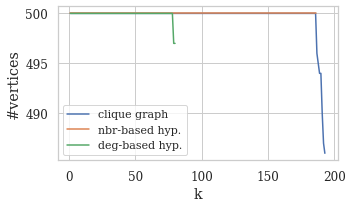

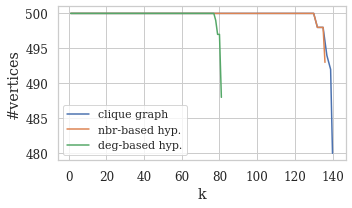

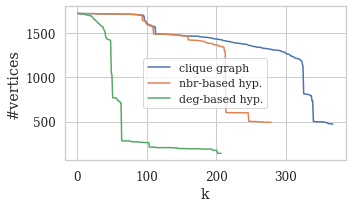

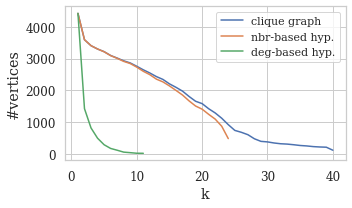

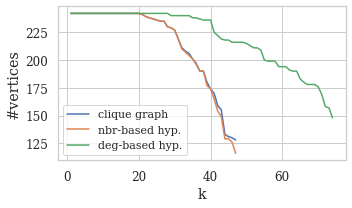

In [122]:
import pickle
import matplotlib.pyplot as plt 
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

# plt.style.use('plot.mplstyle')
save = True
_min = 1
_max = 100
def get_core_decomposition(core_numbers):
    _max = max(core_numbers.values())
    freq = { k : 0 for k in range(_min,_max+1)} 
    for node, val in core_numbers.items():
        for i in range(1, val+1):
            freq[i] = freq.get(i, 0)+1
    return freq

# for dataset in ['enron']:
# for dataset in ['congress','enron','contact']:
for dataset in ['bin_2', 'bin_5', 'congress', 'enron', 'contact']:
    algo_list = ['graph_core', 'naive_nbr', 'naive_degree']
    goodname = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }

    fig = plt.figure(figsize=(5, 3))
    ax = fig.add_subplot(1, 1, 1)
    for algo in algo_list:
        fname = "tests/tmp/" + dataset + "_" + algo + ".pkl"
        with open(fname, 'rb') as handle:
            hgDecompose = pickle.load(handle)
            core_base = hgDecompose.core
            core_decomp = get_core_decomposition(core_base)
            x = list(core_decomp.keys())
            y = [core_decomp[i] for i in x]
            plt.plot(x,y, label = goodname[algo])
    plt.xlabel('k', fontsize='x-large')
    plt.ylabel('#vertices', fontsize='x-large')
    # plt.legend(loc = 'upper right')
    plt.legend()
    plt.tight_layout()
    plt.savefig('data/output/qualitative/'+ dataset+'.pdf')